## Calibrar modelos 

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay

In [7]:
X_train_nocontrov= pd.read_csv("../data/train/datos_procesados_X_train_nocontrov.csv")
X_test_nocontrov= pd.read_csv("../data/test/datos_procesados_X_test_nocontrov.csv")
X_train_ros_nocontrov= pd.read_csv("../data/train/datos_procesados_X_train_ros_nocontrov.csv")
X_test_ros_nocontrov= pd.read_csv("../data/test/datos_procesados_X_test_ros_nocontrov.csv")

X_train_ryg=pd.read_csv("../data/train/datos_procesados_Xtrain_ryg.csv")
X_test_ryg=pd.read_csv("../data/test/datos_procesados_Xtest_ryg.csv")
y_train_ryg=pd.read_csv("../data/train/datos_procesados_ytrain_ryg.csv")
y_test_ryg=pd.read_csv("../data/test/datos_procesados_ytest_ryg.csv")

X_train_ros=pd.read_csv("../data/train/datos_procesados_Xtrain_ros.csv")
X_test_ros=pd.read_csv("../data/test/datos_procesados_Xtest_ros.csv")
y_train_ros=pd.read_csv("../data/train/datos_procesados_ytrain_ros.csv")
y_test_ros=pd.read_csv("../data/test/datos_procesados_ytest_ros.csv")

In [9]:
tree_clf_puro = pickle.load(open('../models/untrained/untrained_model_tree_cfl.pkl', 'rb'))
forest_clf_puro = pickle.load(open('../models/untrained/untrained_model_forest_cfl.pkl', 'rb'))
reglog_clf_puro = pickle.load(open('../models/untrained/untrained_model_reglog_cfl.pkl', 'rb'))
knn_clf_puro = pickle.load(open('../models/untrained/untrained_model_knn_cfl.pkl', 'rb'))

In [11]:
clf_list = [
    (tree_clf_puro, "Tree"),
    (forest_clf_puro, "Forest"),
]
clf_list_ros = [
    (reglog_clf_puro, "Logistic Regression"),
    (knn_clf_puro, "K Near Neighbours"),
]

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A co

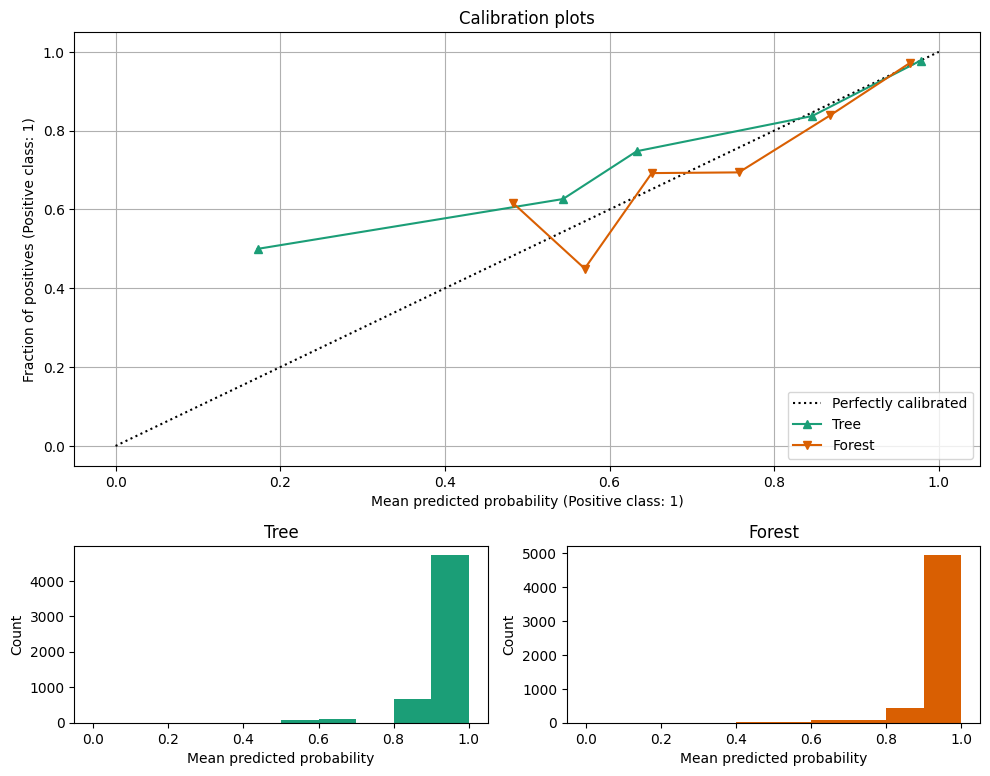

In [12]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")


ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_ryg, y_train_ryg)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_ryg,
        y_test_ryg,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A co

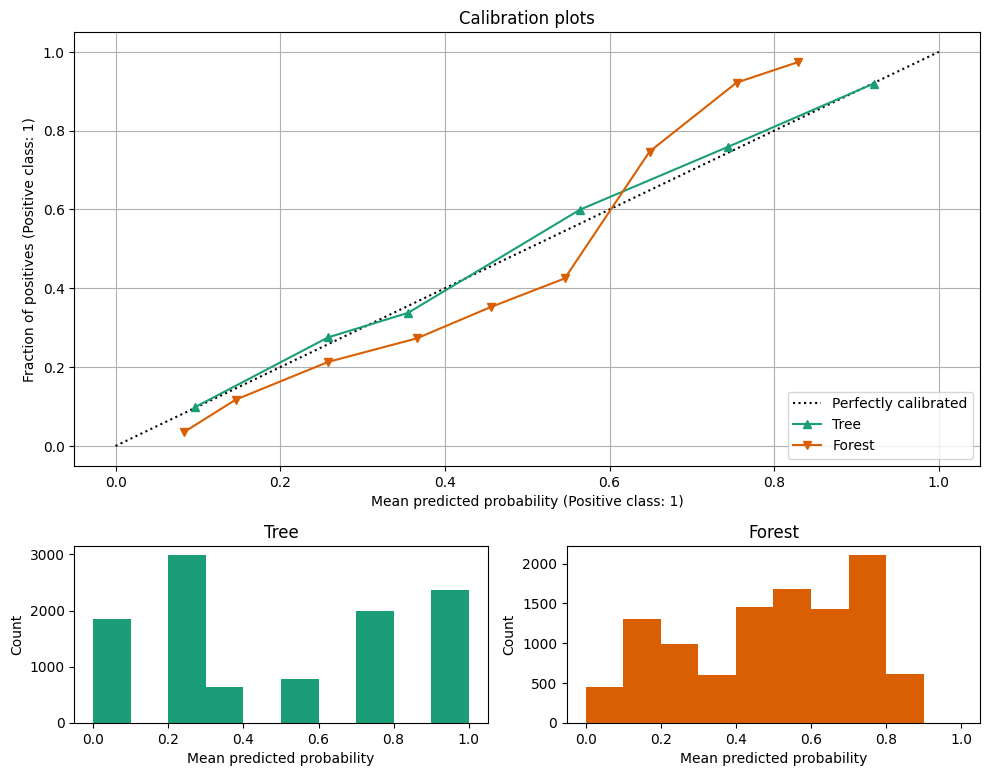

In [15]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")


ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_ros, y_train_ros)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_ros,
        y_test_ros,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elast

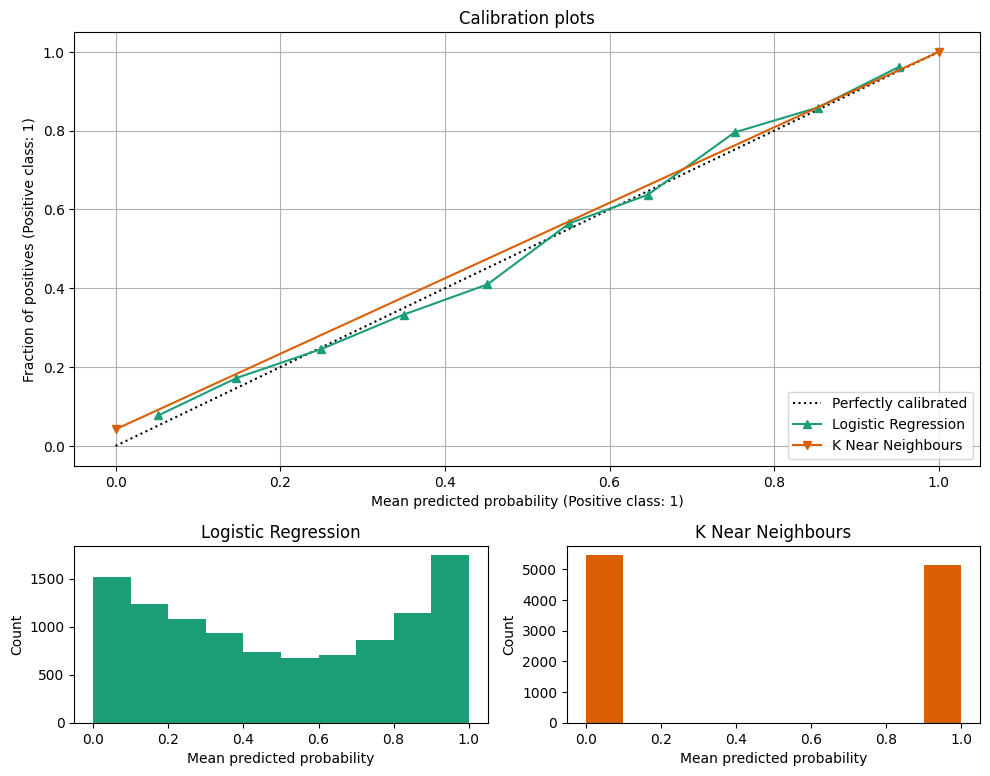

In [14]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")


ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list_ros):
    clf.fit(X_train_ros, y_train_ros)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_ros,
        y_test_ros,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list_ros):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report, brier_score_loss

brier_score = brier_score_loss(y_test_ryg, forest_clf_puro.predict_proba(X = X_test_ryg)[:, 1])
print(f"Brier score = {brier_score}")
print("")
print(classification_report(y_test_ryg, forest_clf_puro.predict(X = X_test_ryg)))

Brier score = 0.15851248564108167

              precision    recall  f1-score   support

           0       0.16      0.71      0.26       275
           1       0.98      0.81      0.89      5327

    accuracy                           0.81      5602
   macro avg       0.57      0.76      0.58      5602
weighted avg       0.94      0.81      0.86      5602



In [29]:
from sklearn.ensemble import RandomForestClassifier
class ForestCalibrado(RandomForestClassifier):

    def fit(self, X_train_ryg, y_train_ryg):
        super().fit(X_train_ryg, y_train_ryg)
        df = self.decision_function(X_train_ryg)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X_train_ryg):
        df = self.decision_function(X_train_ryg)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [26]:
forest_clf_calibrado = ForestCalibrado()

clf_list = [
    (forest_clf_puro, "Forest"),
    (forest_clf_calibrado, "Forest Calibrado"),
]

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A co

AttributeError: 'ForestCalibrado' object has no attribute 'decision_function'

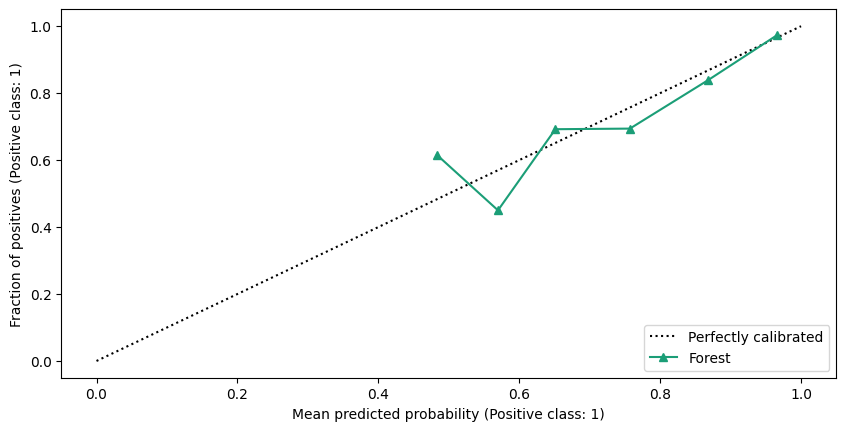

In [30]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_ryg, y_train_ryg)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_ryg,
        y_test_ryg,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import classification_report, brier_score_loss

brier_score = brier_score_loss(y_test_ryg, forest_clf_calibrado.predict_proba(X = X_test_ryg)[:, 1])
print(f"Brier score = {brier_score}")
print("")
print(classification_report(y_test_ryg, forest_clf_calibrado.predict(X = X_test_ryg)))

AttributeError: 'ForestCalibrado' object has no attribute 'decision_function'